In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle
import joblib 
import warnings 
warnings.filterwarnings("ignore")

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score



In [4]:
df = pd.read_csv("german_credit_data.csv")

In [5]:
df.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,499.500,288.819436,0.0,249.75,499.5,749.25,999.0
Age,1000.0,35.546,11.375469,19.0,27.00,33.0,42.00,75.0
Job,1000.0,1.904,0.653614,0.0,2.00,2.0,2.00,3.0
Credit amount,1000.0,3271.258,2822.736876,250.0,1365.50,2319.5,3972.25,18424.0
Duration,1000.0,20.903,12.058814,4.0,12.00,18.0,24.00,72.0


In [6]:
df.drop("Unnamed: 0", axis = 1, inplace = True )

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 78.2+ KB


In [8]:
df.shape

(1000, 10)

In [9]:
df.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [10]:

df["Saving accounts"].mode()[0]

'little'

In [11]:

df["Checking account"].mode()[0]

'little'

In [12]:
df["Saving accounts"] = df["Saving accounts"].fillna(df["Saving accounts"].mode()[0])
df["Checking account"] = df["Checking account"].fillna(df["Checking account"].mode()[0])

In [13]:
df.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [14]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,little,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,little,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


<Figure size 1000x2000 with 0 Axes>

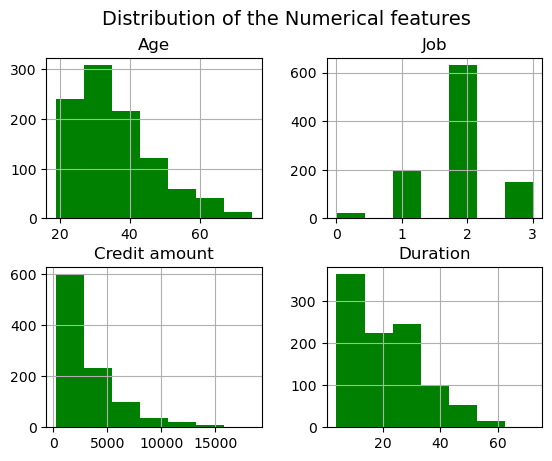

In [15]:
plt.figure(figsize = (10,20))

df.select_dtypes(include =[int, float]).hist( bins = 7, color = "green")
plt.suptitle("Distribution of the Numerical features", fontsize = 14)
plt.show()

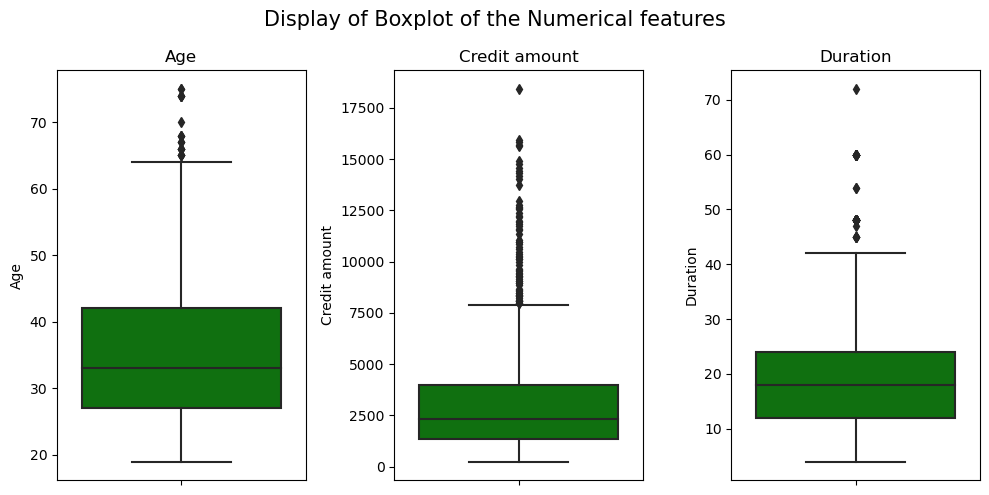

In [16]:
plt.figure(figsize= (10, 5))
for i , col in enumerate(["Age", "Credit amount", "Duration"]):
    plt.subplot(1,3,i+1)
    sns.boxplot( y = df[col], color = "green")
    plt.title(col)
    plt.suptitle("Display of Boxplot of the Numerical features", fontsize = 15)

plt.tight_layout()
plt.show()    


In [17]:
Categorical = df.select_dtypes(include = "object")

In [18]:
Categorical.columns

Index(['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose',
       'Risk'],
      dtype='object')

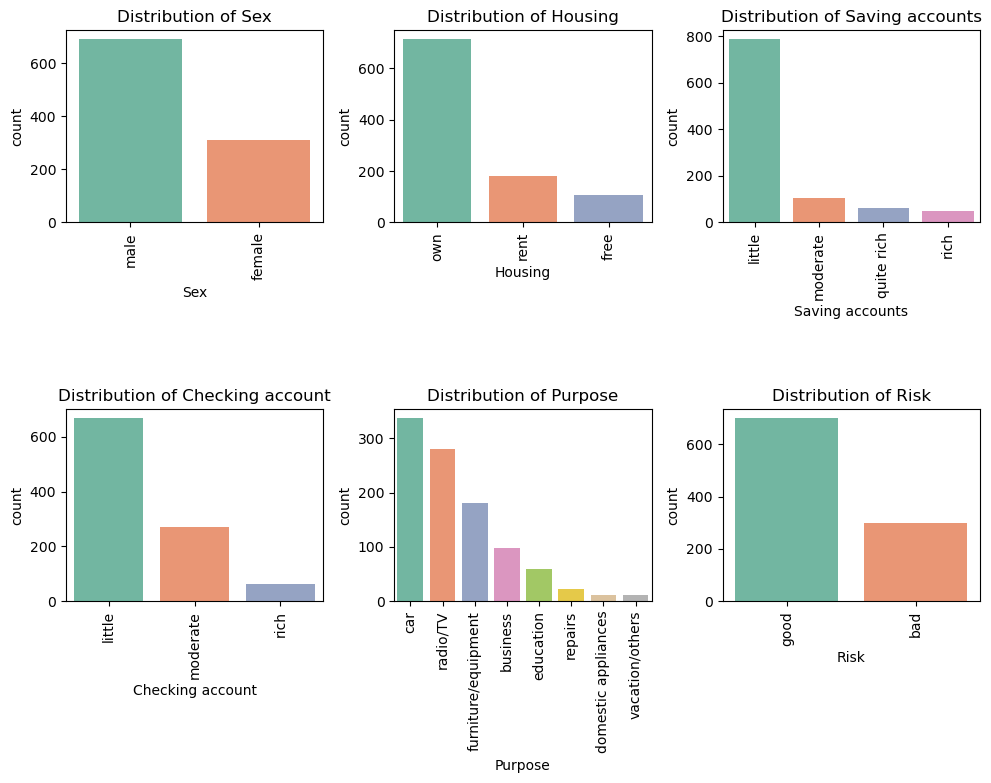

In [19]:
plt.figure(figsize=(10, 10))

for i, col in enumerate(Categorical):
    plt.subplot(3, 3, i + 1)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index , palette = "Set2")
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

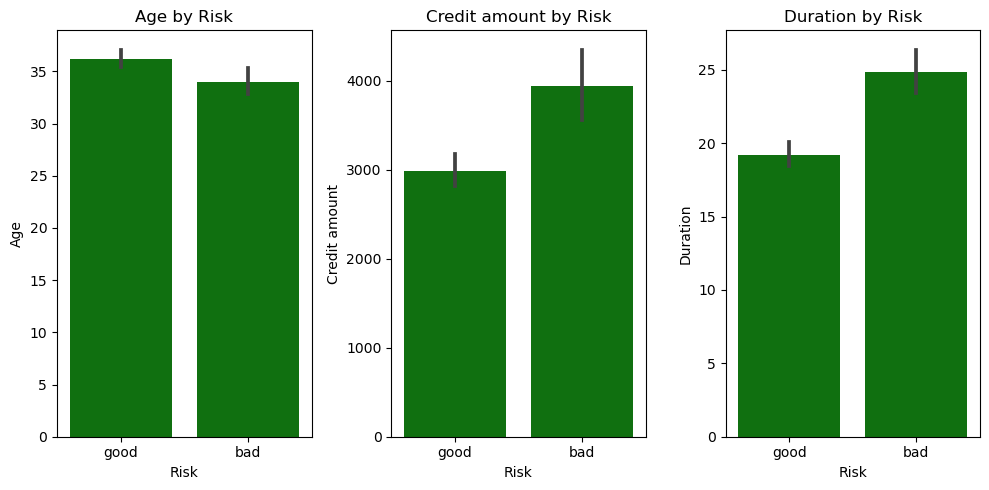

In [20]:
plt.figure(figsize = (10,5))

for i , col in enumerate([ "Age","Credit amount", "Duration"]):
    plt.subplot(1, 3,i+1)
    sns.barplot(data = df, x = "Risk", y = col, color = "green" )
    plt.title(f"{col} by Risk")



plt.tight_layout()
plt.show()    

In [21]:
df.groupby("Risk")[["Age","Credit amount", "Duration"]].mean()

,Age,Credit amount,Duration
Risk,,,
bad,33.963333,3938.126667,24.860000
good,36.224286,2985.457143,19.207143


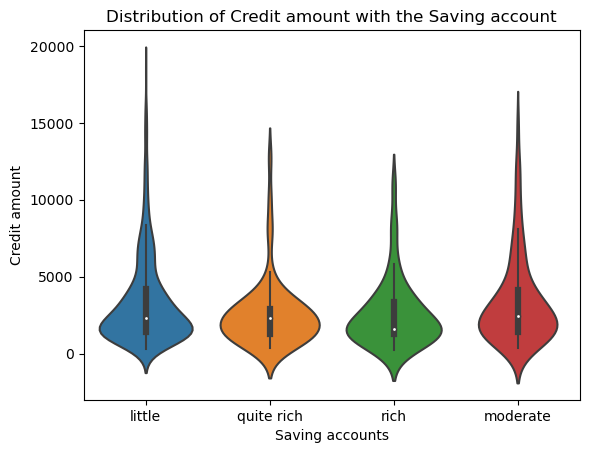

In [22]:
sns.violinplot(data = df, y = "Credit amount",  x = "Saving accounts")
plt.title("Distribution of Credit amount with the Saving account")
plt.show()

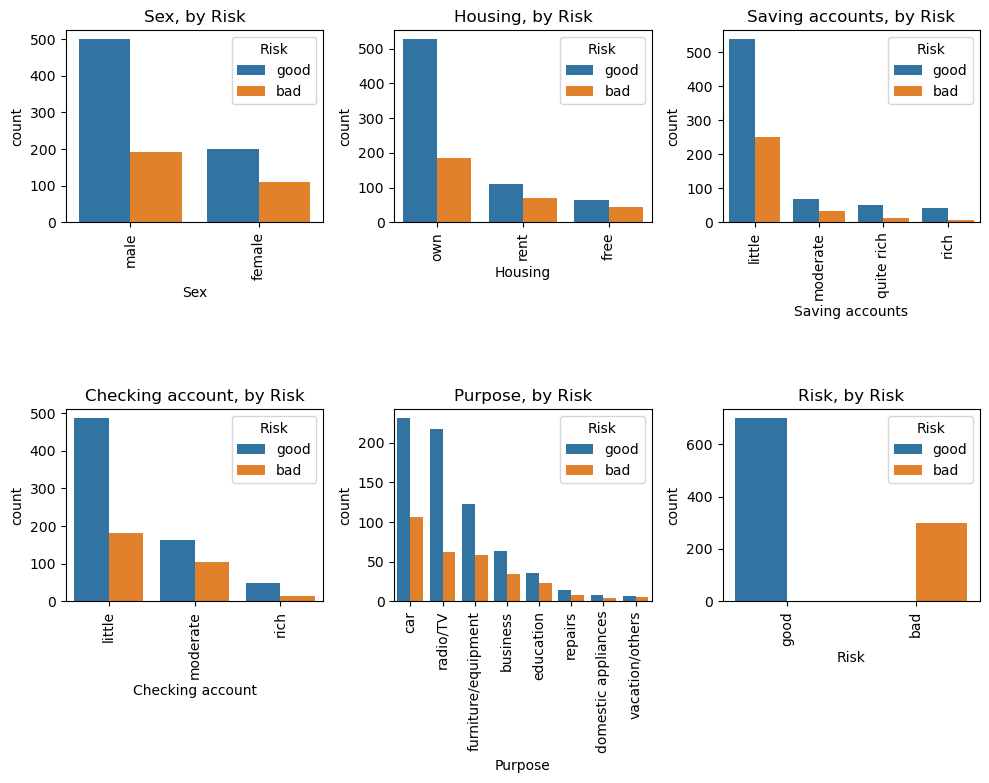

In [23]:

plt.figure(figsize=(10,10))

for i, col in enumerate(Categorical):
    plt.subplot(3,3, i+ 1)
    sns.countplot(data = df , x = col , hue = "Risk", order = df[col].value_counts().index )
    plt.title(f"{col}, by Risk")
    plt.xticks(rotation = 90)


plt.tight_layout()
plt.show()


In [24]:
df_numeric = df[["Age", "Duration","Credit amount", "Job"]]

In [25]:
df_numeric.corr()

,Age,Duration,Credit amount,Job
Age,1.000000,-0.036136,0.032716,0.015673
Duration,-0.036136,1.000000,0.624984,0.210910
Credit amount,0.032716,0.624984,1.000000,0.285385
Job,0.015673,0.210910,0.285385,1.000000


<Axes: >

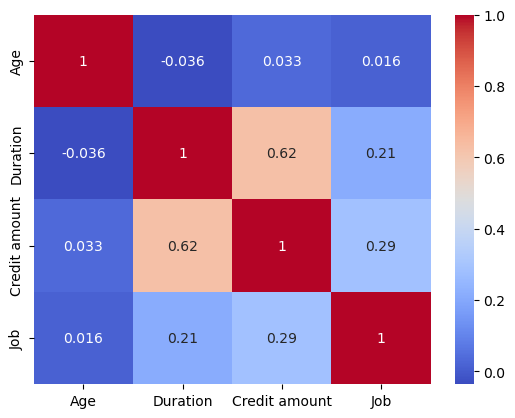

In [26]:
sns.heatmap(df_numeric.corr(), annot = True, cmap = "coolwarm")

In [27]:
cat_cols = df.select_dtypes(include = "object")

In [28]:
le_dict = {}

In [29]:
from sklearn.preprocessing import LabelEncoder , StandardScaler

In [90]:
le = LabelEncoder()

for col in df.columns:


    if df[col].dtypes == "object":
        
        df[col] = le.fit_transform(df[col])

In [91]:
df.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,1,2,1,0,0,1169,6,5,1
1,22,0,2,1,0,1,5951,48,5,0
2,49,1,1,1,0,0,2096,12,3,1
3,45,1,2,0,0,0,7882,42,4,1
4,53,1,2,0,0,0,4870,24,1,0


In [92]:
y = df["Risk"]
x = df.drop("Risk", axis =1 )

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size = 0.2, random_state = 1)

In [94]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

In [99]:
x_train.shape,x_test.shape, y_train.shape, y_test.shape 

((800, 9), (200, 9), (800,), (200,))

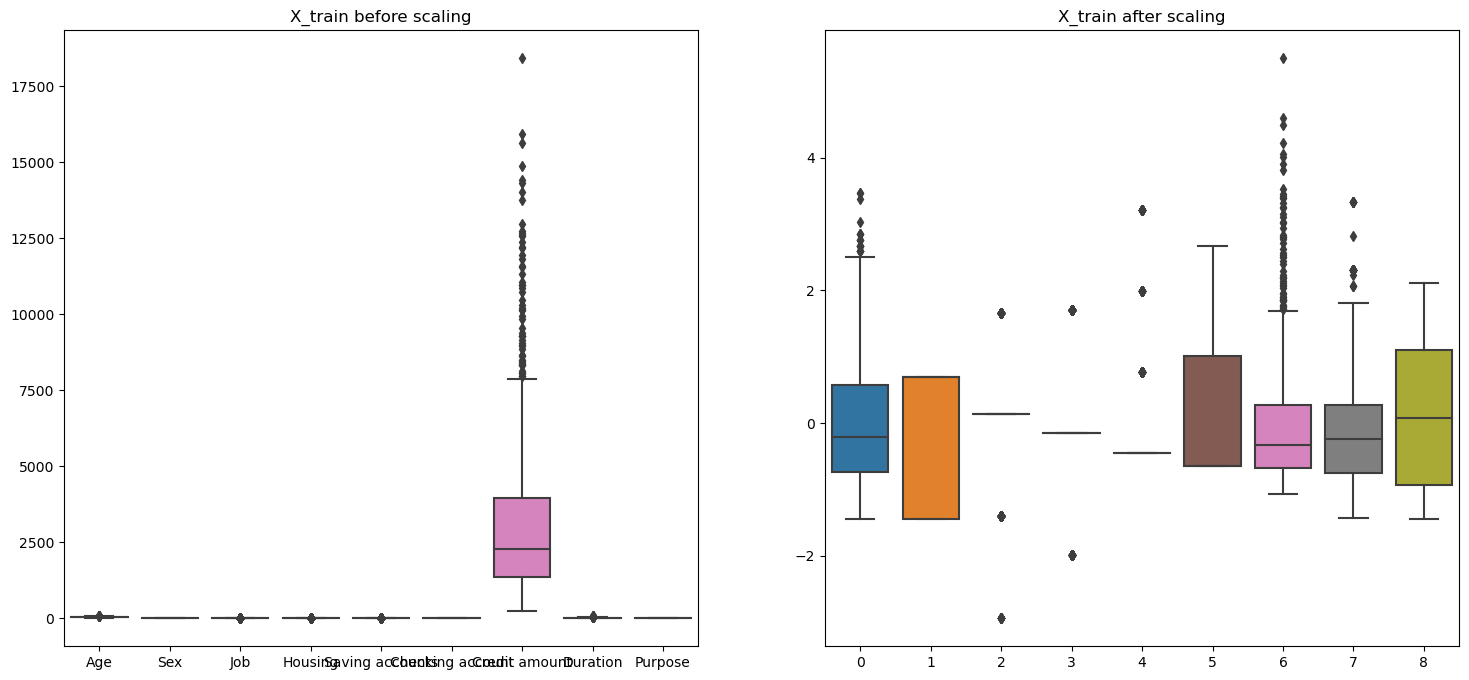

In [104]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

sns.boxplot(x_train, ax=axes[0])
axes[0].set_title('X_train before scaling')

sns.boxplot(X_train, ax=axes[1])
axes[1].set_title('X_train after scaling')
plt.show()


In [95]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']

In [96]:

log_reg = LogisticRegression(max_iter=1000)
param_grid_lr = {
    "C": [0.01, 0.1, 1, 10],
    "solver": ["liblinear", "lbfgs"]
}




grid_lr = GridSearchCV(log_reg, param_grid_lr, cv=5, scoring="accuracy", n_jobs=-1)
grid_lr.fit(X_train, y_train)
y_pred_lr = grid_lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)

rf = RandomForestClassifier(random_state=1)
param_grid_rf = {


    
    "n_estimators": [100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5]
}
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring="accuracy", n_jobs=-1)
grid_rf.fit(X_train, y_train)
y_pred_rf = grid_rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)

In [ ]:
print({




    "LinearRegression" :acc_lr,
    "RandomForestClassifier": acc_lr,


}

)

{'LinearRegression': 0.705, 'RandomForestClassifier': 0.705}


In [97]:
import pickle

In [98]:
joblib.dump(grid_rf, "grid_rf.pkl")

['grid_rf.pkl']